In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns 
from scipy import stats
from scipy.stats import chi2_contingency, randint
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [3]:
df = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\train.csv")
testdf = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\test.csv")

In [4]:
df = pd.DataFrame(df)
testdf = pd.DataFrame(testdf)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df.drop(columns=["PassengerId"])

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.Survived.value_counts(normalize=True)
#We know now that the data is mildly imbalanced. 

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
df.Age = df.Age.fillna(df.Age.median())

In [11]:
df.Cabin = df.Cabin.fillna(df.Cabin.mode()[0])

In [12]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

<Axes: xlabel='Pclass', ylabel='Survived'>

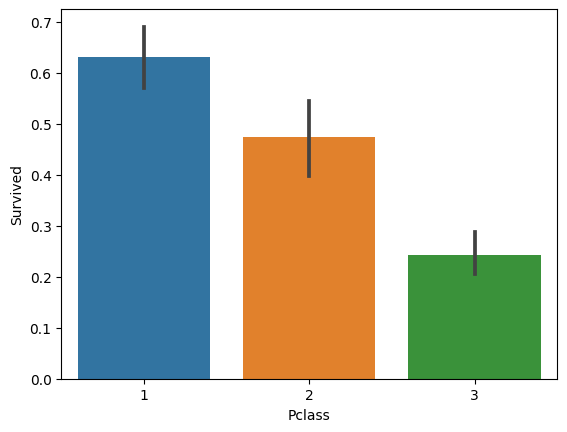

In [14]:
sns.barplot(x = df.Pclass, y= df.Survived)

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

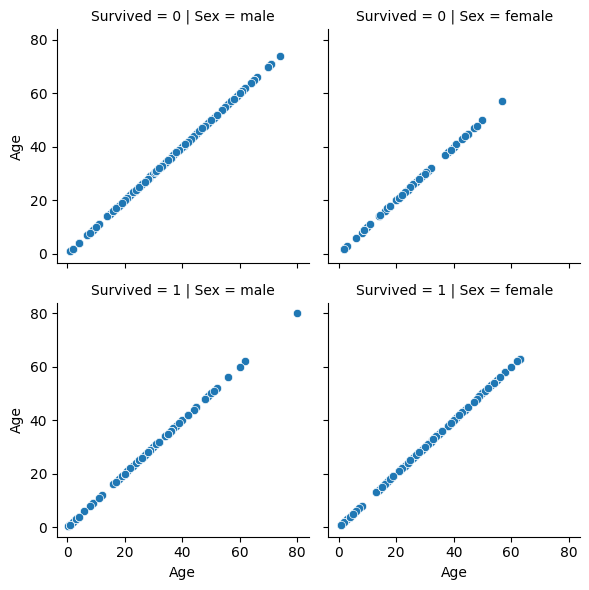

In [15]:
g= sns.FacetGrid(df, col= "Sex", row= "Survived")
g.map(sns.scatterplot, "Age", "Age")
#here we can see that oldest woman on deck was at most 63-ish, and they survived. Age is not an indicator when it comes to women.

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='Fare'>

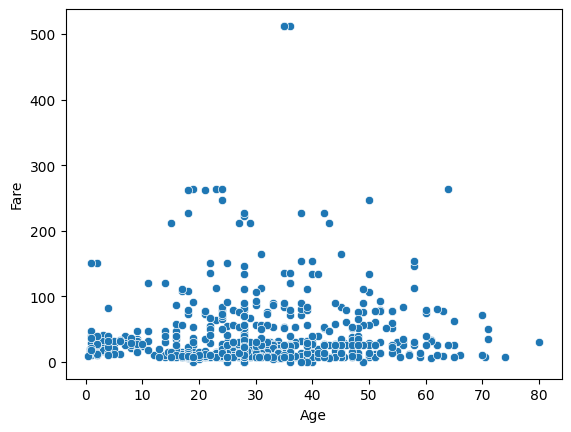

In [16]:
sns.scatterplot(df, x = "Age", y= "Fare")
#There is no correlation between Age and the money paid for the ticket.

C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

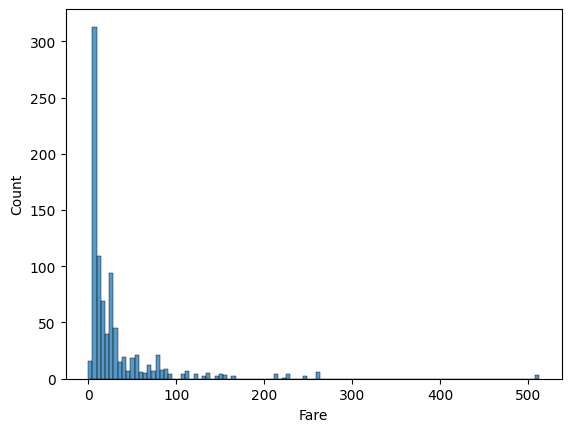

In [17]:
sns.histplot(df["Fare"])

In [18]:
bins = [0, 2, 8, 15, 23, 35, 48, 65, 80]

In [19]:
labels = ["baby", "young child", "older child", "teenager", "young adult", "adult", "older adult", "elderly"]

In [20]:
df["AgeCategory"] = pd.cut(x= df["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

In [21]:
bins2 = [0, 8, 15, 30, 50, 80, 120, 200, 300, 600]

In [22]:
labels2 = ["very cheap", "cheap", "moderately cheap", "normal price", "moderately expensive", "expensive", "very expensive", "luxury", "very luxury"]

In [23]:
df["FareCategory"] = pd.cut(x= df["Fare"], bins=bins2, labels=labels2, right=True, include_lowest=True)

In [24]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory,FareCategory
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,teenager,very cheap
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,moderately expensive
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,young adult,very cheap
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adult,moderately expensive
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,young adult,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,young adult,cheap
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenager,moderately cheap
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,young adult,moderately cheap
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young adult,moderately cheap


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Fare', ylabel='Pclass'>

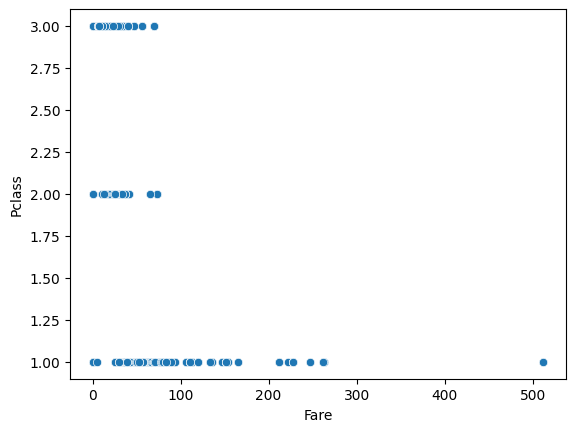

In [25]:
sns.scatterplot(df, x= "Fare", y="Pclass")
#While the fare for 3rd and 2nd class can only go up to 100$, 1st class fares can go upto 500$+.

In [26]:
df = df.drop(["Age", "Fare"], axis=1)

In [27]:
df

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,AgeCategory,FareCategory
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,B96 B98,S,teenager,very cheap
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C,adult,moderately expensive
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,B96 B98,S,young adult,very cheap
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S,young adult,moderately expensive
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,B96 B98,S,young adult,cheap
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0,0,211536,B96 B98,S,young adult,cheap
887,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,B42,S,teenager,moderately cheap
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,B96 B98,S,young adult,moderately cheap
889,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,C148,C,young adult,moderately cheap


In [28]:
df["family"] = df["SibSp"] + df["Parch"]
df = df.drop(columns=["Parch", "SibSp"])
df

,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked,AgeCategory,FareCategory,family
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S,teenager,very cheap,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,adult,moderately expensive,1
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S,young adult,very cheap,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,young adult,moderately expensive,1
4,0,3,"Allen, Mr. William Henry",male,373450,B96 B98,S,young adult,cheap,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,211536,B96 B98,S,young adult,cheap,0
887,1,1,"Graham, Miss. Margaret Edith",female,112053,B42,S,teenager,moderately cheap,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96 B98,S,young adult,moderately cheap,3
889,1,1,"Behr, Mr. Karl Howell",male,111369,C148,C,young adult,moderately cheap,0


In [29]:
df["Title"] =  df.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
df = df.drop(columns=["Name"])

In [30]:
categoric = []
numeric = []
for i in df.columns:
    if df[i].dtypes == "int64" or df[i].dtypes == "float64":
        numeric.append(df[i])
    if df[i].dtypes == "object" or df[i].dtypes == "category":
        categoric.append(df[i])
    

In [31]:
categoric = pd.DataFrame(categoric).T
categoric

,Sex,Ticket,Cabin,Embarked,AgeCategory,FareCategory,Title
0,male,A/5 21171,B96 B98,S,teenager,very cheap,Mr
1,female,PC 17599,C85,C,adult,moderately expensive,Mrs
2,female,STON/O2. 3101282,B96 B98,S,young adult,very cheap,Miss
3,female,113803,C123,S,young adult,moderately expensive,Mrs
4,male,373450,B96 B98,S,young adult,cheap,Mr
...,...,...,...,...,...,...,...
886,male,211536,B96 B98,S,young adult,cheap,Rev
887,female,112053,B42,S,teenager,moderately cheap,Miss
888,female,W./C. 6607,B96 B98,S,young adult,moderately cheap,Miss
889,male,111369,C148,C,young adult,moderately cheap,Mr


In [32]:
numeric = pd.DataFrame(numeric).T
numeric

,Survived,Pclass,family
0,0,3,1
1,1,1,1
2,1,3,0
3,1,1,1
4,0,3,0
...,...,...,...
886,0,2,0
887,1,1,0
888,0,3,3
889,1,1,0


In [33]:
corr_matr = numeric.corr()

<Axes: >

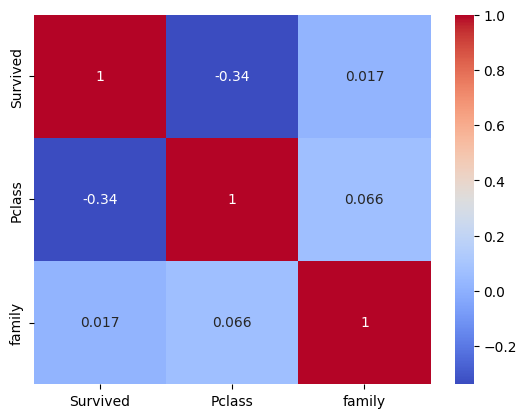

In [34]:
sns.heatmap(corr_matr, annot=True, cmap="coolwarm")

In [35]:
for col in corr_matr.columns: 
    for index in corr_matr.index: #here we look at each index of each column of corr_matr
        if col != "Survived" and index != "Survived":
            corr_value = corr_matr.loc[index,col] #and here by using .loc we can easily access the values of those index-column pairs
            if col != index: #we wrote this code because we dont want to delete the "1" of each index=column pairs and we dont want to delete a column-index pair if they have high correlation with label
                if corr_value < -0.70 or corr_value > 0.70:
                    if col in numeric.columns and index in numeric.columns:
                        if numeric[col].std() < numeric[index].std():
                            numeric.drop(col, axis=1, inplace=True)
                        else:
                            numeric.drop(index, axis=1, inplace=True)

In [36]:
numeric

,Survived,Pclass,family
0,0,3,1
1,1,1,1
2,1,3,0
3,1,1,1
4,0,3,0
...,...,...,...
886,0,2,0
887,1,1,0
888,0,3,3
889,1,1,0


In [37]:
lstofsignificant = []
for i in categoric.columns:
    if i != "Survived":
        contingency_table = pd.crosstab(categoric[i], numeric["Survived"])
        stat, p, dof, expected = chi2_contingency(contingency_table)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Not significant')
        else:
            print('Significant')
            lstofsignificant.append(categoric[i])

lstofsignificant = pd.DataFrame(lstofsignificant).T
lstofsignificant

stat=260.717, p=0.000
Significant
stat=766.570, p=0.012
Significant
stat=232.754, p=0.000
Significant
stat=25.964, p=0.000
Significant
stat=24.276, p=0.001
Significant
stat=109.320, p=0.000
Significant
stat=300.023, p=0.000
Significant


,Sex,Ticket,Cabin,Embarked,AgeCategory,FareCategory,Title
0,male,A/5 21171,B96 B98,S,teenager,very cheap,Mr
1,female,PC 17599,C85,C,adult,moderately expensive,Mrs
2,female,STON/O2. 3101282,B96 B98,S,young adult,very cheap,Miss
3,female,113803,C123,S,young adult,moderately expensive,Mrs
4,male,373450,B96 B98,S,young adult,cheap,Mr
...,...,...,...,...,...,...,...
886,male,211536,B96 B98,S,young adult,cheap,Rev
887,female,112053,B42,S,teenager,moderately cheap,Miss
888,female,W./C. 6607,B96 B98,S,young adult,moderately cheap,Miss
889,male,111369,C148,C,young adult,moderately cheap,Mr


In [38]:
finaldf = pd.concat([numeric, lstofsignificant], axis=1)

In [39]:
finaldf

,Survived,Pclass,family,Sex,Ticket,Cabin,Embarked,AgeCategory,FareCategory,Title
0,0,3,1,male,A/5 21171,B96 B98,S,teenager,very cheap,Mr
1,1,1,1,female,PC 17599,C85,C,adult,moderately expensive,Mrs
2,1,3,0,female,STON/O2. 3101282,B96 B98,S,young adult,very cheap,Miss
3,1,1,1,female,113803,C123,S,young adult,moderately expensive,Mrs
4,0,3,0,male,373450,B96 B98,S,young adult,cheap,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,male,211536,B96 B98,S,young adult,cheap,Rev
887,1,1,0,female,112053,B42,S,teenager,moderately cheap,Miss
888,0,3,3,female,W./C. 6607,B96 B98,S,young adult,moderately cheap,Miss
889,1,1,0,male,111369,C148,C,young adult,moderately cheap,Mr


In [40]:
finaldf["Ticket"] = finaldf.Ticket.apply(lambda x: x.split(" ")[0].strip() if len(x) > 6 else "1")

In [41]:
finaldf

,Survived,Pclass,family,Sex,Ticket,Cabin,Embarked,AgeCategory,FareCategory,Title
0,0,3,1,male,A/5,B96 B98,S,teenager,very cheap,Mr
1,1,1,1,female,PC,C85,C,adult,moderately expensive,Mrs
2,1,3,0,female,STON/O2.,B96 B98,S,young adult,very cheap,Miss
3,1,1,1,female,1,C123,S,young adult,moderately expensive,Mrs
4,0,3,0,male,1,B96 B98,S,young adult,cheap,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,male,1,B96 B98,S,young adult,cheap,Rev
887,1,1,0,female,1,B42,S,teenager,moderately cheap,Miss
888,0,3,3,female,W./C.,B96 B98,S,young adult,moderately cheap,Miss
889,1,1,0,male,1,C148,C,young adult,moderately cheap,Mr


In [42]:
finaldf.groupby("Sex")["Survived"].value_counts()
#You are more likely to survive if you are female. Even tho there are less females their survival rate is higher.

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [43]:
finaldf.groupby("family")["Survived"].value_counts()
#You are more likely to survive if you are alone in the ship, makes sense since you dont need to think about others

family  Survived
0       0           374
        1           163
1       1            89
        0            72
2       1            59
        0            43
3       1            21
        0             8
4       0            12
        1             3
5       0            19
        1             3
6       0             8
        1             4
7       0             6
10      0             7
Name: count, dtype: int64

In [44]:
finaldf.Cabin.value_counts()

Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64

In [45]:
finaldf.groupby("Title")["Survived"].value_counts().to_frame()

count
Title        Survived       
Capt         0             1
Col          0             1
             1             1
Don          0             1
Dr           0             4
             1             3
Jonkheer     0             1
Lady         1             1
Major        1             1
             0             1
Master       1            23
             0            17
Miss         1           127
             0            55
Mlle         1             2
Mme          1             1
Mr           0           436
             1            81
Mrs          1            99
             0            26
Ms           1             1
Rev          0             6
Sir          1             1
the Countess 1             1

In [46]:
finaldf

,Survived,Pclass,family,Sex,Ticket,Cabin,Embarked,AgeCategory,FareCategory,Title
0,0,3,1,male,A/5,B96 B98,S,teenager,very cheap,Mr
1,1,1,1,female,PC,C85,C,adult,moderately expensive,Mrs
2,1,3,0,female,STON/O2.,B96 B98,S,young adult,very cheap,Miss
3,1,1,1,female,1,C123,S,young adult,moderately expensive,Mrs
4,0,3,0,male,1,B96 B98,S,young adult,cheap,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,male,1,B96 B98,S,young adult,cheap,Rev
887,1,1,0,female,1,B42,S,teenager,moderately cheap,Miss
888,0,3,3,female,W./C.,B96 B98,S,young adult,moderately cheap,Miss
889,1,1,0,male,1,C148,C,young adult,moderately cheap,Mr


In [47]:
columns_to_encode = ["Title", "Embarked"]
onehot = OneHotEncoder(handle_unknown="ignore")
fitteddata = onehot.fit(finaldf[columns_to_encode])
transformeddata = onehot.transform(finaldf[columns_to_encode])
transformeddf = pd.DataFrame(transformeddata.toarray() , columns=onehot.get_feature_names_out(columns_to_encode))

In [48]:
finaldf = finaldf.drop(columns=["Embarked", "Title", "Cabin"], axis=1)
finaldf = pd.concat([finaldf, transformeddf],axis=1)

In [49]:
finaldf

,Survived,Pclass,family,Sex,Ticket,AgeCategory,FareCategory,Title_Capt,Title_Col,Title_Don,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,male,A/5,teenager,very cheap,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,1,female,PC,adult,moderately expensive,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,0,female,STON/O2.,young adult,very cheap,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,1,female,1,young adult,moderately expensive,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,0,male,1,young adult,cheap,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,male,1,young adult,cheap,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,1,1,0,female,1,teenager,moderately cheap,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0,3,3,female,W./C.,young adult,moderately cheap,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1,0,male,1,young adult,moderately cheap,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
finaldf = finaldf.sort_index(axis=1)

In [52]:
columns_to_label = ["Sex", "Ticket"]
label = LabelEncoder()
for i in columns_to_label:
    label.fit(finaldf[i])
    finaldf[i] = label.transform(finaldf[i])

In [53]:
finaldf

,AgeCategory,Embarked_C,Embarked_Q,Embarked_S,FareCategory,Pclass,Sex,Survived,Ticket,Title_Capt,...,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,family
0,teenager,0.0,0.0,1.0,very cheap,3,1,0,15,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,adult,1.0,0.0,0.0,moderately expensive,1,0,1,28,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,young adult,0.0,0.0,1.0,very cheap,3,0,1,47,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,young adult,0.0,0.0,1.0,moderately expensive,1,0,1,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,young adult,0.0,0.0,1.0,cheap,3,1,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,young adult,0.0,0.0,1.0,cheap,2,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
887,teenager,0.0,0.0,1.0,moderately cheap,1,0,1,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
888,young adult,0.0,0.0,1.0,moderately cheap,3,0,0,49,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
889,young adult,1.0,0.0,0.0,moderately cheap,1,1,1,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [54]:
ordinal_encode = np.array(["AgeCategory", "FareCategory"])
ordinal = OrdinalEncoder()
ordinal.fit(finaldf[ordinal_encode])
finaldf[ordinal_encode] = ordinal.transform(finaldf[ordinal_encode])

In [55]:
X = finaldf.drop("Survived", axis=1)

In [56]:
y= finaldf.Survived

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True, random_state=42, stratify=y)

In [58]:
rand = RandomForestClassifier(random_state=42)

In [59]:
params = {
    "n_estimators": np.arange(50, 1000, 50),
    "max_depth": [5,10,20,30, 40, None],
    "min_samples_split": [2, 4, 6, 10],
    "min_samples_leaf": [1,2,3,4,5]
}

In [60]:
grid1 = GridSearchCV(rand, params)
grid1.fit(X_train, y_train)

bestofrand = grid1.best_estimator_
bestofrand

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=6,
                       random_state=42)

In [61]:
rand = RandomForestClassifier(n_estimators=bestofrand.n_estimators, min_samples_split=bestofrand.min_samples_split, min_samples_leaf=bestofrand.min_samples_leaf, max_depth=bestofrand.max_depth, random_state=42)

rand.fit(X_train, y_train)

y_pred = rand.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy, "cm:", cm, "f1:", f1)

Accuracy: 0.7847533632286996 cm: [[116  21]
 [ 27  59]] f1: 0.7108433734939759


In [62]:
logclass = LogisticRegression(random_state=42)
logclass.fit(X_train, y_train)
y_pred = logclass.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy, "cm:", cm, "f1:", f1)

Accuracy: 0.8071748878923767 cm: [[118  19]
 [ 24  62]] f1: 0.7425149700598802


C:\Users\Aleyna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy, "cm:", cm, "f1:", f1)

Accuracy: 0.7982062780269058 cm: [[125  12]
 [ 33  53]] f1: 0.7019867549668873


In [64]:
gradient = GradientBoostingClassifier()

In [65]:

params = {
    "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.3],
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4, 6],
    "max_depth": [3, 6, 10, 15],
    "min_samples_leaf": [1, 2, 3]
}

In [66]:
"""gridforgradient = GridSearchCV(gradient, params, cv=4, verbose=3)
gridforgradient.fit(X_train, y_train)
resultsforgradient = gridforgradient.best_estimator_
resultsforgradient"""

'gridforgradient = GridSearchCV(gradient, params, cv=4, verbose=3)\ngridforgradient.fit(X_train, y_train)\nresultsforgradient = gridforgradient.best_estimator_\nresultsforgradient'

In [67]:
gradient = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=4, random_state=42)
gradient.fit(X_train, y_train)
y_pred = gradient.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy, "cm:", cm, "f1:", f1)

Accuracy: 0.7982062780269058 cm: [[117  20]
 [ 25  61]] f1: 0.7305389221556886


In [68]:
testdf = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\test.csv")

In [69]:
testdf = pd.DataFrame(testdf)

In [70]:
testdf["family"] = testdf.SibSp + testdf.Parch
testdf = testdf.drop(columns=["SibSp","Parch"])

In [71]:
testdf["Title"] = testdf.Name.apply(lambda x: x.split(",")[1].split(".")[0].strip())
testdf = testdf.drop(columns=["Name"])

In [72]:
testdf = testdf.drop(columns=["PassengerId"])

In [73]:
testdf

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,family,Title
0,3,male,34.5,330911,7.8292,NaN,Q,0,Mr
1,3,female,47.0,363272,7.0000,NaN,S,1,Mrs
2,2,male,62.0,240276,9.6875,NaN,Q,0,Mr
3,3,male,27.0,315154,8.6625,NaN,S,0,Mr
4,3,female,22.0,3101298,12.2875,NaN,S,2,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,A.5. 3236,8.0500,NaN,S,0,Mr
414,1,female,39.0,PC 17758,108.9000,C105,C,0,Dona
415,3,male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr
416,3,male,NaN,359309,8.0500,NaN,S,0,Mr


In [74]:
testdf.isnull().sum()

Pclass        0
Sex           0
Age          86
Ticket        0
Fare          1
Cabin       327
Embarked      0
family        0
Title         0
dtype: int64

In [75]:
testdf.Fare = testdf.Fare.fillna(testdf.Fare.median())
testdf.isnull().sum()

Pclass        0
Sex           0
Age          86
Ticket        0
Fare          0
Cabin       327
Embarked      0
family        0
Title         0
dtype: int64

In [76]:
testdf.Cabin = testdf.Cabin.fillna(testdf.Cabin.mode()[0])
testdf.isnull().sum()

Pclass       0
Sex          0
Age         86
Ticket       0
Fare         0
Cabin        0
Embarked     0
family       0
Title        0
dtype: int64

In [77]:
testdf.Age = testdf.Age.fillna(np.mean(testdf.Age))
testdf.isnull().sum()

Pclass      0
Sex         0
Age         0
Ticket      0
Fare        0
Cabin       0
Embarked    0
family      0
Title       0
dtype: int64

In [78]:
testdf["AgeCategory"] = pd.cut(x= testdf["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

In [79]:
testdf["FareCategory"] = pd.cut(x= testdf["Fare"], bins=bins2, labels=labels2, right=True, include_lowest=True)

In [80]:
testdf["Ticket"] = testdf.Ticket.apply(lambda x: x.split(" ")[0].strip() if len(x) > 6 else "1")

In [81]:
testdf = testdf.drop(["Age", "Fare", "Cabin"], axis=1)

In [82]:
testdf

,Pclass,Sex,Ticket,Embarked,family,Title,AgeCategory,FareCategory
0,3,male,1,Q,0,Mr,young adult,very cheap
1,3,female,1,S,1,Mrs,adult,very cheap
2,2,male,1,Q,0,Mr,older adult,cheap
3,3,male,1,S,0,Mr,young adult,cheap
4,3,female,3101298,S,2,Mrs,teenager,cheap
...,...,...,...,...,...,...,...,...
413,3,male,A.5.,S,0,Mr,young adult,cheap
414,1,female,PC,C,0,Dona,adult,expensive
415,3,male,SOTON/O.Q.,S,0,Mr,adult,very cheap
416,3,male,1,S,0,Mr,young adult,cheap


In [83]:
for i in columns_to_label:
    label.fit(testdf[i])
    testdf[i] = label.transform(testdf[i])

In [84]:
testdf[ordinal_encode] = ordinal.transform(testdf[ordinal_encode])

In [85]:
encoded_data = onehot.transform(testdf[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=onehot.get_feature_names_out(columns_to_encode))

testdf = pd.concat([testdf, encoded_df], axis=1)
testdf = testdf.drop(columns=["Embarked", "Title"])

In [86]:
testdf

,Pclass,Sex,Ticket,family,AgeCategory,FareCategory,Title_Capt,Title_Col,Title_Don,Title_Dr,...,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,6.0,6.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,0,0,1,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,0,0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1,0,0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,0,4,2,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,7,0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,1,0,20,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,3,1,31,0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,3,1,0,0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
testdf = testdf.sort_index(axis=1)

In [88]:
testdf.columns==X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [89]:
y_pred_testdf = rand.predict(testdf)
y_pred_testdf = pd.DataFrame(y_pred_testdf)
y_pred_testdf.columns = ["Survived"]
y_pred_testdf

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [90]:
submission = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\titanic\titanic\gender_submission.csv")
submission = submission.drop(columns=["Survived"])
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [91]:
finalsub = pd.concat([submission, y_pred_testdf],axis=1)
finalsub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [92]:
sub = {
    1.0: 1,
    0.0: 0
}
finalsub.Survived = finalsub.Survived.map(sub)

In [93]:
finalsub.to_csv("TitanicSubmission20", index=False)